In [1]:
import numpy as np
import pandas as pd
import random
from functools import reduce, partial
from operator import add
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()

In [2]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = [None for _ in range(k)]
        
    def predict(self, point):
        dist_min = 10^5
        prediction = 0
        for i, m in enumerate(self.means):
            dist = np.sum((x - y)**2 for x, y in zip(m, point))
            if dist < dist_min:
                prediction = i
                dist_min = dist
        return prediction

    def fit(self, points, n_iter=5):
        clusters = [None for _ in points]
        self.means = random.sample(list(points), self.k)
        for _ in range(n_iter):
            for i, p in enumerate(points):
                clusters[i] = self.predict(p)
            for z in range(self.k):
                cluster = [a for a, b in zip(points, clusters) if b == z]
                len_c = len(cluster)
                self.means[z] = list(map(lambda x: x/len_c, 
                                         reduce(partial(map, add), cluster)))
            self.means = sorted(self.means)

## Create synthetic data set with 3 clusters

In [3]:
centers = [[0, 0], [1, 1], [2, 3]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.5, random_state=42)

### Plot data set

In [4]:
def plot_data(x_data, labels, alpha):
    for i, color in zip(range(3), [sns.xkcd_rgb["ocean blue"], sns.xkcd_rgb["light orange"],
                               sns.xkcd_rgb["kelly green"]]):
        cluster = [p for p, c in zip(x_data, labels) if i == c]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, c=color, alpha=alpha)

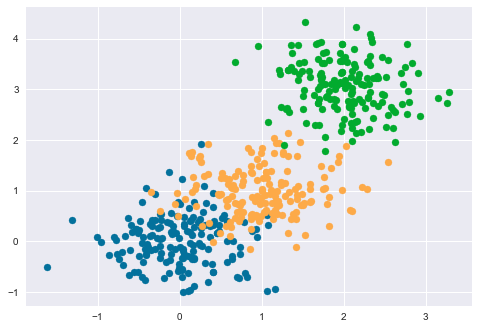

In [5]:
plot_data(X, labels_true, 1)
plt.show()

## Fit KMeans and Plot the data with the calculated centroids for the clusters

In [6]:
# instantiate clsss with 3 clusters
model = KMeans(3)
# fit data and perform 20 iterations
model.fit(X, n_iter=20)
# assign label to data used for fit
clusters_assign = [model.predict(point) for point in X]

In [7]:
model.means

[[-0.021346955207283053, -0.0026383330063026972],
 [1.015881130640619, 1.006624253237753],
 [2.0173858089041428, 3.0486540633306198]]

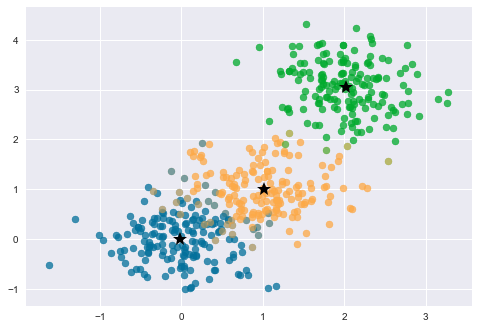

In [8]:
# plot centroids 
for x, y in model.means:
    plt.plot(x, y, marker='*', markersize=15, color='black')

# plot data with labels assigned by kmeans
plot_data(X, clusters_assign, 0.5)

# overlay data points with color based on true labels
plot_data(X, labels_true, 0.5)

plt.show()